In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\windows\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('F:\COURSE\MeriSKILL\Sales Data.csv')
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


# Data Understanding

In [3]:
df.shape

(185950, 11)

In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
#cek statistik
df.describe()

,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [6]:
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
72243,238429,Wired Headphones,1,11.99,2019-08-25 22:25:00,"31 Washington St, Los Angeles, CA 90001",8,11.99,Los Angeles,22
78393,244334,Lightning Charging Cable,1,14.95,2019-08-07 09:19:00,"119 Main St, Los Angeles, CA 90001",8,14.95,Los Angeles,9
183512,220578,AA Batteries (4-pack),2,3.84,2019-06-18 15:05:00,"463 Willow St, Los Angeles, CA 90001",6,7.68,Los Angeles,15
47483,154536,Bose SoundSport Headphones,1,99.99,2019-02-03 09:28:00,"777 Spruce St, San Francisco, CA 94016",2,99.99,San Francisco,9
34706,185879,Wired Headphones,1,11.99,2019-04-02 16:55:00,"90 Jefferson St, Dallas, TX 75001",4,11.99,Dallas,16


In [7]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [8]:
df.nunique()

Order ID            178437
Product                 19
Quantity Ordered         9
Price Each              17
Order Date          142395
Purchase Address    140787
Month                   12
Sales                   53
City                     9
Hour                    24
dtype: int64

In [9]:
#cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
 9   Hour              185950 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 14.2+ MB


# Exploration Data Analysis

In [10]:
cat = ['Product','City','Month']
num = ['Quantity Ordered','Price Each','Sales']
time = ['Order Date','Hour','Month']

In [11]:
df[cat].describe()

,Month
count,185950.000000
mean,7.059140
std,3.502996
min,1.000000
25%,4.000000
50%,7.000000
75%,10.000000
max,12.000000


In [12]:
df[num].describe()

,Quantity Ordered,Price Each,Sales
count,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,185.490917
std,0.442793,332.731330,332.919771
min,1.000000,2.990000,2.990000
25%,1.000000,11.950000,11.950000
50%,1.000000,14.950000,14.950000
75%,1.000000,150.000000,150.000000
max,9.000000,1700.000000,3400.000000


In [13]:
df[time].describe()

,Hour,Month
count,185950.000000,185950.000000
mean,14.413305,7.059140
std,5.423416,3.502996
min,0.000000,1.000000
25%,11.000000,4.000000
50%,15.000000,7.000000
75%,19.000000,10.000000
max,23.000000,12.000000


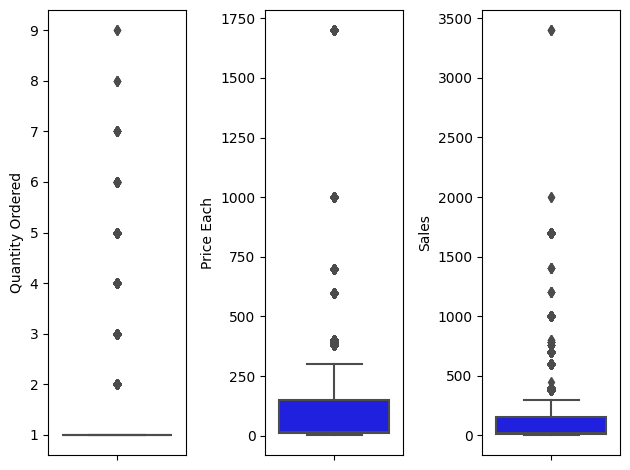

In [14]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]], color='blue')
    plt.tight_layout()

C:\Users\windows\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\windows\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\windows\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

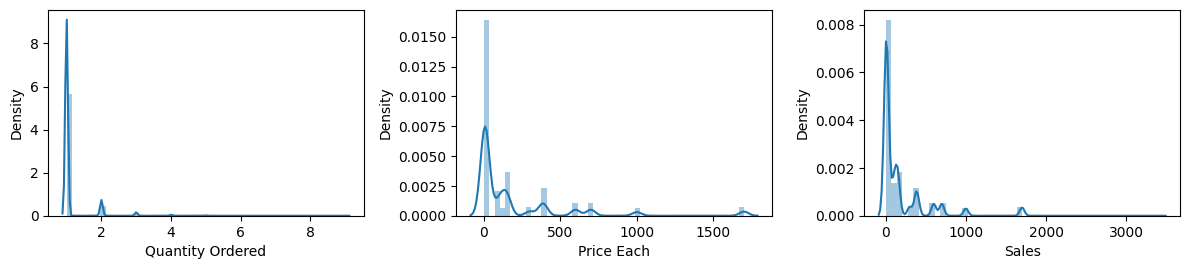

In [15]:
plt.figure(figsize=(12, 5))
for i in range(0, len(num)):
    plt.subplot(2, len(num), i+1)
    sns.distplot(df[num[i]])
    plt.tight_layout()

C:\Users\windows\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\windows\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\windows\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


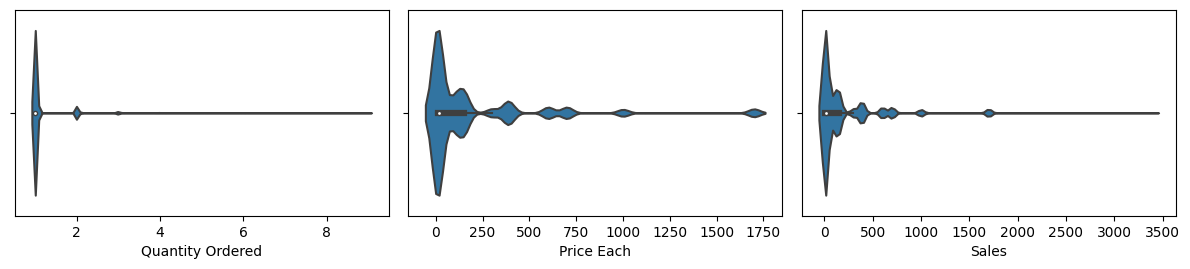

In [16]:
plt.figure(figsize=(12, 5))
for i in range(0, len(num)):
    plt.subplot(2, len(num), i+1)
    sns.violinplot(df[num[i]],)
    plt.tight_layout()

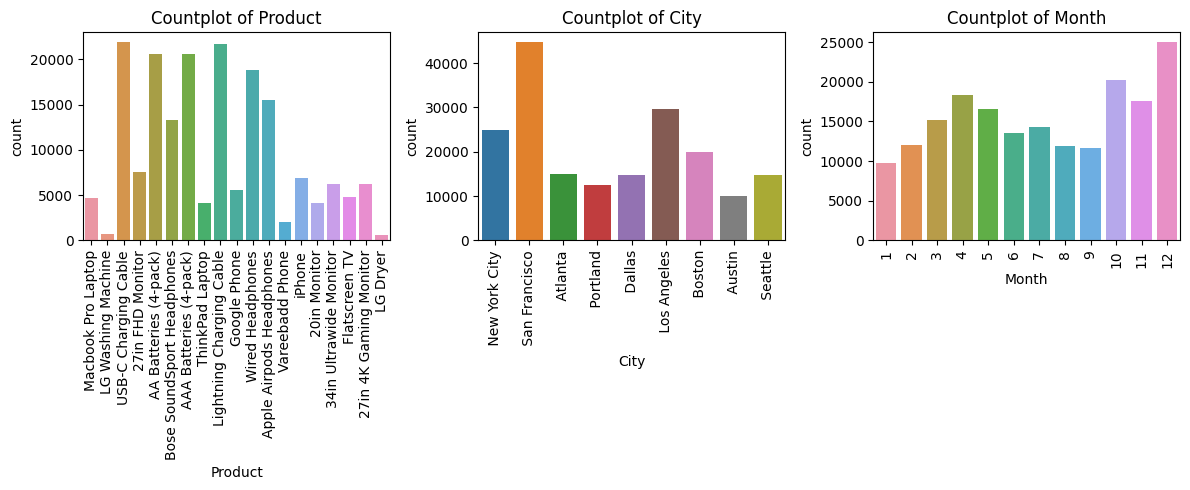

In [17]:
plt.figure(figsize=(12, 5))

for i in range(0, len(cat)):
    plt.subplot(1, len(cat), i+1)
    sns.countplot(x=df[cat[i]])
    plt.title(f'Countplot of {cat[i]}')
    plt.xticks(rotation=90)  # Rotasi label sumbu x

    plt.tight_layout()

In [18]:
df.corr()

,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
Order ID,1.000000,0.000702,-0.002857,0.993063,-0.002949,0.001175
Quantity Ordered,0.000702,1.000000,-0.148272,0.000791,-0.139417,-0.002218
Price Each,-0.002857,-0.148272,1.000000,-0.003375,0.999203,0.001721
Month,0.993063,0.000791,-0.003375,1.000000,-0.003466,0.001731
Sales,-0.002949,-0.139417,0.999203,-0.003466,1.000000,0.001668
Hour,0.001175,-0.002218,0.001721,0.001731,0.001668,1.000000


<Axes: >

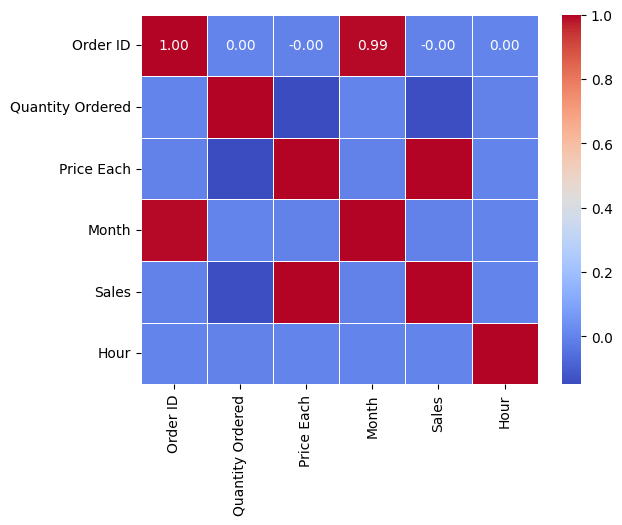

In [19]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f', linewidth=0.5)

In [ ]:
sns.pairplot(df,diag_kind='kde')

In [ ]:
fig = plt.figure(figsize=(15, 15))

for i in range(0, len(num)):
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='City', y=num[i]) 
    plt.xticks(rotation =90)
    plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(15, 15))

for i in range(0, len(num)):
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Product', y=num[i]) 
    plt.xticks(rotation = 90)
    plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(15, 15))

for i in range(0, len(num)):
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Month', y=num[i]) 
    plt.tight_layout()

# Data Preprocessing

In [ ]:
#Check Missing Value
df.isna().sum()

In [ ]:
#Check Duplicated Data
df.duplicated()